<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get update -qqq

# Bibliotecas necessárias para instalação do cartopy e geoplot
#   Ver: https://github.com/googlecolab/colabtools/issues/85#issuecomment-372532728
!apt-get install -y -qqq libproj-dev proj-data proj-bin
!apt-get install -y -qqq libgeos-dev

!pip install -q -U cartopy
!pip install -q -U geopandas
!pip install -q -U geoplot

In [0]:
import pandas as pd
import mapclassify
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt

In [0]:
stations_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115089&authkey=AN3WuZnSKh9jgC8")
inmetr_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115090&authkey=AHJ7x3UN1MzJW1M")

In [0]:
df = pd.merge(stations_df, inmetr_df, on='id')

In [0]:
!wget -q "https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_BRA_shp.zip"
!unzip -qq -u gadm36_BRA_shp.zip

In [0]:
br = gpd.read_file('gadm36_BRA_1.shp') # 0=país, 1=estado, 2=cidade

In [0]:
# Preparando os dados para geração dos mapas enquanto a análise numérica não é finalizada.
df_sorted = df.sort_values(by=['date'])
tair_df_2018_08 = df_sorted[(df_sorted['date'] >= '2018-08-01') & (df_sorted['date'] <= '2018-08-31')]

tair_lst_2018_08 = [v for k, v in tair_df_2018_08.groupby('date')]

tair_df_2018_08_01_00 = tair_lst_2018_08[0]
gdf_2018_08_01_00 = gpd.GeoDataFrame(
    tair_df_2018_08_01_00, 
    geometry=gpd.points_from_xy(tair_df_2018_08_01_00.lon, tair_df_2018_08_01_00.lat))

In [0]:
# Plotagem dos gráficos.
# TODO: iterar sobre a lista e gerar o .gif.
# O plot desejado contém o parâmetro clip, mas, como a função demora a plotar 
# o gráfico quando esse parâmetro é enviado, usamos um plot sem ele apenas 
# para testes.

# ax = gplt.kdeplot(gdf_2018_08_01_00[gdf_2018_08_01_00['tair'] > 0], shade=True, cmap='Reds', n_levels=20, )
# gplt.polyplot(br, zorder=1, ax=ax)
# plt.title("Mapa de ???, 08/01/2018 00:00")

Text(0.5, 1.0, 'Air Temperature @ 2018/08/01 ')

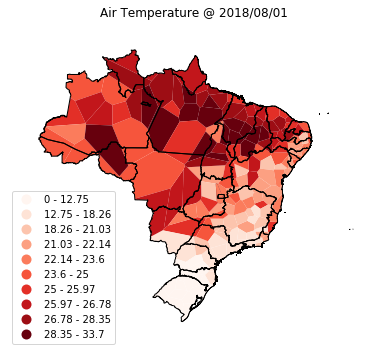

In [14]:
var = 'tair'
ax = gplt.voronoi(
    gdf_2018_08_01_00[gdf_2018_08_01_00[var] == gdf_2018_08_01_00[var]], # Nota: NaN == NaN sempre retorna False!
    clip=br.simplify(0.1),
    hue=var, k=10, cmap='Reds', edgecolor='None',
    legend=True
)
gplt.polyplot(br, edgecolor='black', zorder=1, ax=ax)
ax.set_title("Air Temperature @ 2018/08/01 ")